In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [6]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'} 

In [12]:
print(df.pixels)

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
35882    50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883    178 174 172 173 181 188 191 194 196 199 200 20...
35884    17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885    30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...
35886    19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...
Name: pixels, Length: 35887, dtype: object


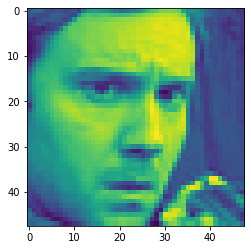

In [14]:
#np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float')
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

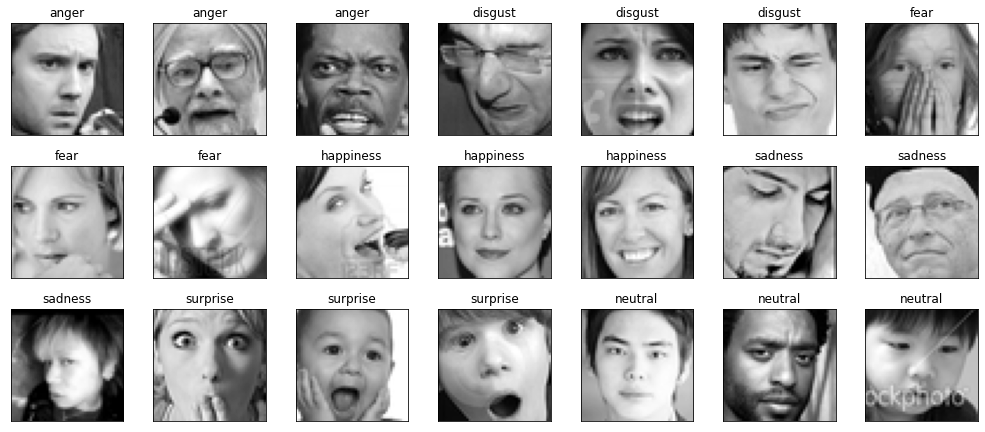

In [17]:
#np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float')
#pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [36]:
img_array = df.pixels.apply(lambda x : np.array(x.split(' ')).reshape(48, 48).astype('float32'))

ValueError: cannot reshape array of size 2304 into shape (48,48,3)

In [7]:
img_array = np.stack(img_array, axis=0)
img_array.shape
#pyplot.imshow(img_array[0])

(35887, 48, 48, 1)

In [8]:
labels = df.emotion.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(img_array, labels, test_size=0.1)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298,), (3589,))

In [11]:
X_train = X_train/255
X_test =X_test/255

In [27]:
mobielNetV2 = tf.keras.applications.MobileNetV2(include_top=False,weights='imagenet')

In [28]:
mobielNetV2.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 Conv1 (Conv2D)                 (None, None, None,   864         ['input_3[0][0]']                
                                32)                                                               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, None, None,   128         ['Conv1[0][0]']                  
                                32)                                            

                                                                                                  
 block_3_expand (Conv2D)        (None, None, None,   3456        ['block_2_add[0][0]']            
                                144)                                                              
                                                                                                  
 block_3_expand_BN (BatchNormal  (None, None, None,   576        ['block_3_expand[0][0]']         
 ization)                       144)                                                              
                                                                                                  
 block_3_expand_relu (ReLU)     (None, None, None,   0           ['block_3_expand_BN[0][0]']      
                                144)                                                              
                                                                                                  
 block_3_p

                                192)                                                              
                                                                                                  
 block_6_expand_BN (BatchNormal  (None, None, None,   768        ['block_6_expand[0][0]']         
 ization)                       192)                                                              
                                                                                                  
 block_6_expand_relu (ReLU)     (None, None, None,   0           ['block_6_expand_BN[0][0]']      
                                192)                                                              
                                                                                                  
 block_6_pad (ZeroPadding2D)    (None, None, None,   0           ['block_6_expand_relu[0][0]']    
                                192)                                                              
          

 block_9_expand_BN (BatchNormal  (None, None, None,   1536       ['block_9_expand[0][0]']         
 ization)                       384)                                                              
                                                                                                  
 block_9_expand_relu (ReLU)     (None, None, None,   0           ['block_9_expand_BN[0][0]']      
                                384)                                                              
                                                                                                  
 block_9_depthwise (DepthwiseCo  (None, None, None,   3456       ['block_9_expand_relu[0][0]']    
 nv2D)                          384)                                                              
                                                                                                  
 block_9_depthwise_BN (BatchNor  (None, None, None,   1536       ['block_9_depthwise[0][0]']      
 malizatio

                                                                                                  
 block_12_depthwise (DepthwiseC  (None, None, None,   5184       ['block_12_expand_relu[0][0]']   
 onv2D)                         576)                                                              
                                                                                                  
 block_12_depthwise_BN (BatchNo  (None, None, None,   2304       ['block_12_depthwise[0][0]']     
 rmalization)                   576)                                                              
                                                                                                  
 block_12_depthwise_relu (ReLU)  (None, None, None,   0          ['block_12_depthwise_BN[0][0]']  
                                576)                                                              
                                                                                                  
 block_12_

 onv2D)                         960)                                                              
                                                                                                  
 block_15_depthwise_BN (BatchNo  (None, None, None,   3840       ['block_15_depthwise[0][0]']     
 rmalization)                   960)                                                              
                                                                                                  
 block_15_depthwise_relu (ReLU)  (None, None, None,   0          ['block_15_depthwise_BN[0][0]']  
                                960)                                                              
                                                                                                  
 block_15_project (Conv2D)      (None, None, None,   153600      ['block_15_depthwise_relu[0][0]']
                                160)                                                              
          

In [29]:
for layer in mobielNetV2.layers: 
    layer.trainable = False


In [30]:
mobielNetV2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = mobielNetV2.fit(X_train,y_train,verbose=1, epochs=20,validation_steps=0.2)
#model.save("MobileNet.h5")

Epoch 1/20


ValueError: in user code:

    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 859, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Prity-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 248, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "mobilenetv2_1.00_224" (type Functional).
    
    Input 0 of layer "Conv1" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (None, 48, 48, 1)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 48, 48, 1), dtype=float32)
      • training=True
      • mask=None


In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.5),
                                    
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(48,48,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.5),
                                    
                                   tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(48,48,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.5),
                                    
                                   tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(48,48,1)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.BatchNormalization(),
                                   tf.keras.layers.Dropout(0.5),
                                    
                                   tf.keras.layers.Flatten(), 
                                   tf.keras.layers.Dense(1000, activation='relu'),
                                   tf.keras.layers.Dense(7, activation='softmax')
                                   
                                   ])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 23, 23, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 23, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0

In [14]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001), loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
import os
try:
    os.mkdir('checkpoint')
except:
    pass

In [16]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 monitor='val_accuracy', 
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True, 
                                                 save_weights_only=False, 
                                                 mode='max')

In [17]:
model.fit(X_train, y_train, epochs=200, validation_split=0.2, callbacks=call_back)

Epoch 1/200
808/808 [==============================] - ETA: 0s - loss: 1.8720 - accuracy: 0.2372
Epoch 1: val_accuracy improved from -inf to 0.24567, saving model to checkpoint\best_model.h5
808/808 [==============================] - 125s 152ms/step - loss: 1.8720 - accuracy: 0.2372 - val_loss: 1.9369 - val_accuracy: 0.2457
Epoch 2/200
808/808 [==============================] - ETA: 0s - loss: 1.8019 - accuracy: 0.2635
Epoch 2: val_accuracy improved from 0.24567 to 0.27028, saving model to checkpoint\best_model.h5
808/808 [==============================] - 129s 159ms/step - loss: 1.8019 - accuracy: 0.2635 - val_loss: 1.7793 - val_accuracy: 0.2703
Epoch 3/200
808/808 [==============================] - ETA: 0s - loss: 1.7587 - accuracy: 0.2890
Epoch 3: val_accuracy improved from 0.27028 to 0.30495, saving model to checkpoint\best_model.h5
808/808 [==============================] - 130s 161ms/step - loss: 1.7587 - accuracy: 0.2890 - val_loss: 1.7316 - val_accuracy: 0.3050
Epoch 4/200
808/

Epoch 27/200
808/808 [==============================] - ETA: 0s - loss: 1.2978 - accuracy: 0.5004
Epoch 27: val_accuracy improved from 0.53560 to 0.53638, saving model to checkpoint\best_model.h5
808/808 [==============================] - 129s 160ms/step - loss: 1.2978 - accuracy: 0.5004 - val_loss: 1.2319 - val_accuracy: 0.5364
Epoch 28/200
808/808 [==============================] - ETA: 0s - loss: 1.2872 - accuracy: 0.5065
Epoch 28: val_accuracy improved from 0.53638 to 0.54102, saving model to checkpoint\best_model.h5
808/808 [==============================] - 129s 159ms/step - loss: 1.2872 - accuracy: 0.5065 - val_loss: 1.2105 - val_accuracy: 0.5410
Epoch 29/200
808/808 [==============================] - ETA: 0s - loss: 1.2744 - accuracy: 0.5101
Epoch 29: val_accuracy did not improve from 0.54102
808/808 [==============================] - 128s 159ms/step - loss: 1.2744 - accuracy: 0.5101 - val_loss: 1.2261 - val_accuracy: 0.5322
Epoch 30/200
808/808 [==============================]

Epoch 54/200
808/808 [==============================] - ETA: 0s - loss: 1.1608 - accuracy: 0.5605
Epoch 54: val_accuracy did not improve from 0.58003
808/808 [==============================] - 89s 110ms/step - loss: 1.1608 - accuracy: 0.5605 - val_loss: 1.1357 - val_accuracy: 0.5721
Epoch 55/200
808/808 [==============================] - ETA: 0s - loss: 1.1588 - accuracy: 0.5582
Epoch 55: val_accuracy did not improve from 0.58003
808/808 [==============================] - 88s 109ms/step - loss: 1.1588 - accuracy: 0.5582 - val_loss: 1.1370 - val_accuracy: 0.5683
Epoch 56/200
808/808 [==============================] - ETA: 0s - loss: 1.1507 - accuracy: 0.5640
Epoch 56: val_accuracy improved from 0.58003 to 0.58034, saving model to checkpoint\best_model.h5
808/808 [==============================] - 89s 110ms/step - loss: 1.1507 - accuracy: 0.5640 - val_loss: 1.1159 - val_accuracy: 0.5803
Epoch 57/200
807/808 [============================>.] - ETA: 0s - loss: 1.1522 - accuracy: 0.5645
Epoc

Epoch 82/200
808/808 [==============================] - ETA: 0s - loss: 1.0818 - accuracy: 0.5918
Epoch 82: val_accuracy did not improve from 0.59706
808/808 [==============================] - 89s 111ms/step - loss: 1.0818 - accuracy: 0.5918 - val_loss: 1.1060 - val_accuracy: 0.5814
Epoch 83/200
808/808 [==============================] - ETA: 0s - loss: 1.0748 - accuracy: 0.5925
Epoch 83: val_accuracy did not improve from 0.59706
808/808 [==============================] - 88s 109ms/step - loss: 1.0748 - accuracy: 0.5925 - val_loss: 1.0797 - val_accuracy: 0.5884
Epoch 84/200
808/808 [==============================] - ETA: 0s - loss: 1.0727 - accuracy: 0.5942
Epoch 84: val_accuracy did not improve from 0.59706
808/808 [==============================] - 88s 109ms/step - loss: 1.0727 - accuracy: 0.5942 - val_loss: 1.0885 - val_accuracy: 0.5899
Epoch 85/200
808/808 [==============================] - ETA: 0s - loss: 1.0654 - accuracy: 0.5974
Epoch 85: val_accuracy did not improve from 0.5970

808/808 [==============================] - 93s 115ms/step - loss: 0.9813 - accuracy: 0.6314 - val_loss: 1.0621 - val_accuracy: 0.6093
Epoch 139/200
808/808 [==============================] - ETA: 0s - loss: 0.9954 - accuracy: 0.6291
Epoch 139: val_accuracy improved from 0.61424 to 0.61718, saving model to checkpoint\best_model.h5
808/808 [==============================] - 94s 116ms/step - loss: 0.9954 - accuracy: 0.6291 - val_loss: 1.0443 - val_accuracy: 0.6172
Epoch 140/200
808/808 [==============================] - ETA: 0s - loss: 0.9733 - accuracy: 0.6355
Epoch 140: val_accuracy did not improve from 0.61718
808/808 [==============================] - 112s 138ms/step - loss: 0.9733 - accuracy: 0.6355 - val_loss: 1.0569 - val_accuracy: 0.6076
Epoch 141/200
808/808 [==============================] - ETA: 0s - loss: 0.9775 - accuracy: 0.6317
Epoch 141: val_accuracy did not improve from 0.61718
808/808 [==============================] - 86s 106ms/step - loss: 0.9775 - accuracy: 0.6317 - v

Epoch 167/200
808/808 [==============================] - ETA: 0s - loss: 0.9556 - accuracy: 0.6420
Epoch 167: val_accuracy did not improve from 0.61966
808/808 [==============================] - 88s 109ms/step - loss: 0.9556 - accuracy: 0.6420 - val_loss: 1.0552 - val_accuracy: 0.6111
Epoch 168/200
807/808 [============================>.] - ETA: 0s - loss: 0.9552 - accuracy: 0.6423
Epoch 168: val_accuracy did not improve from 0.61966
808/808 [==============================] - 81s 100ms/step - loss: 0.9553 - accuracy: 0.6422 - val_loss: 1.0685 - val_accuracy: 0.6057
Epoch 169/200
808/808 [==============================] - ETA: 0s - loss: 0.9577 - accuracy: 0.6430
Epoch 169: val_accuracy did not improve from 0.61966
808/808 [==============================] - 86s 106ms/step - loss: 0.9577 - accuracy: 0.6430 - val_loss: 1.0397 - val_accuracy: 0.6195
Epoch 170/200
808/808 [==============================] - ETA: 0s - loss: 0.9464 - accuracy: 0.6435
Epoch 170: val_accuracy did not improve fro

808/808 [==============================] - 85s 105ms/step - loss: 0.9294 - accuracy: 0.6576 - val_loss: 1.0510 - val_accuracy: 0.6098
Epoch 196/200
808/808 [==============================] - ETA: 0s - loss: 0.9257 - accuracy: 0.6544
Epoch 196: val_accuracy did not improve from 0.62059
808/808 [==============================] - 84s 104ms/step - loss: 0.9257 - accuracy: 0.6544 - val_loss: 1.0394 - val_accuracy: 0.6173
Epoch 197/200
808/808 [==============================] - ETA: 0s - loss: 0.9326 - accuracy: 0.6529
Epoch 197: val_accuracy did not improve from 0.62059
808/808 [==============================] - 82s 101ms/step - loss: 0.9326 - accuracy: 0.6529 - val_loss: 1.0520 - val_accuracy: 0.6115
Epoch 198/200
807/808 [============================>.] - ETA: 0s - loss: 0.9238 - accuracy: 0.6541
Epoch 198: val_accuracy did not improve from 0.62059
808/808 [==============================] - 80s 99ms/step - loss: 0.9238 - accuracy: 0.6540 - val_loss: 1.0527 - val_accuracy: 0.6085
Epoch 199

In [18]:
print("Accuracy of our model on validation data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

113/113 [==============================] - 2s 22ms/step - loss: 1.0795 - accuracy: 0.6080
Accuracy of our model on validation data :  60.7968807220459 %


In [19]:
y_pred = model.predict(X_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

[4, 2, 3, 6, 3, 4, 6, 3, 3, 0]

In [63]:
#y_actual = []

#for pred in y_test:
#    y_actual.append(np.argmax(pred))
#y_actual[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [67]:
#--------------Confusion Matrix------------------
#from sklearn.metrics import confusion_matrix, classification_report
#print(classification_report(y_actual, y_result))


              precision    recall  f1-score   support

           0       1.00      0.08      0.14      3589
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.08      3589
   macro avg       0.14      0.01      0.02      3589
weighted avg       1.00      0.08      0.14      3589



In [20]:
model.predict(np.expand_dims(X_test[10], axis=0)).round(2)

array([[0.  , 0.  , 0.02, 0.  , 0.  , 0.98, 0.  ]], dtype=float32)

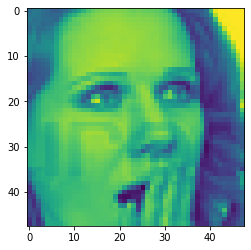

In [21]:
pyplot.imshow(X_test[10])

In [22]:
np.argmax(model.predict(np.expand_dims(X_test[2052], axis=0)).round(2))

6

In [23]:
y_test[2052]

6

actual label is fear
predicted label is fear


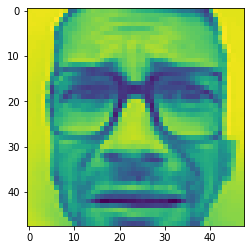

In [24]:
#1st Prediction
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(20):
    print(f'actual label is {label_to_text[y_test[k]]}')
    predicted_class = final_model.predict(tf.expand_dims(X_test[k], 0)).argmax()
    print(f'predicted label is {label_to_text[predicted_class]}')
    pyplot.imshow(X_test[k].reshape((48, 48)))
    pyplot.show()
    time.sleep(3)
    clear_output(wait=True)

In [42]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


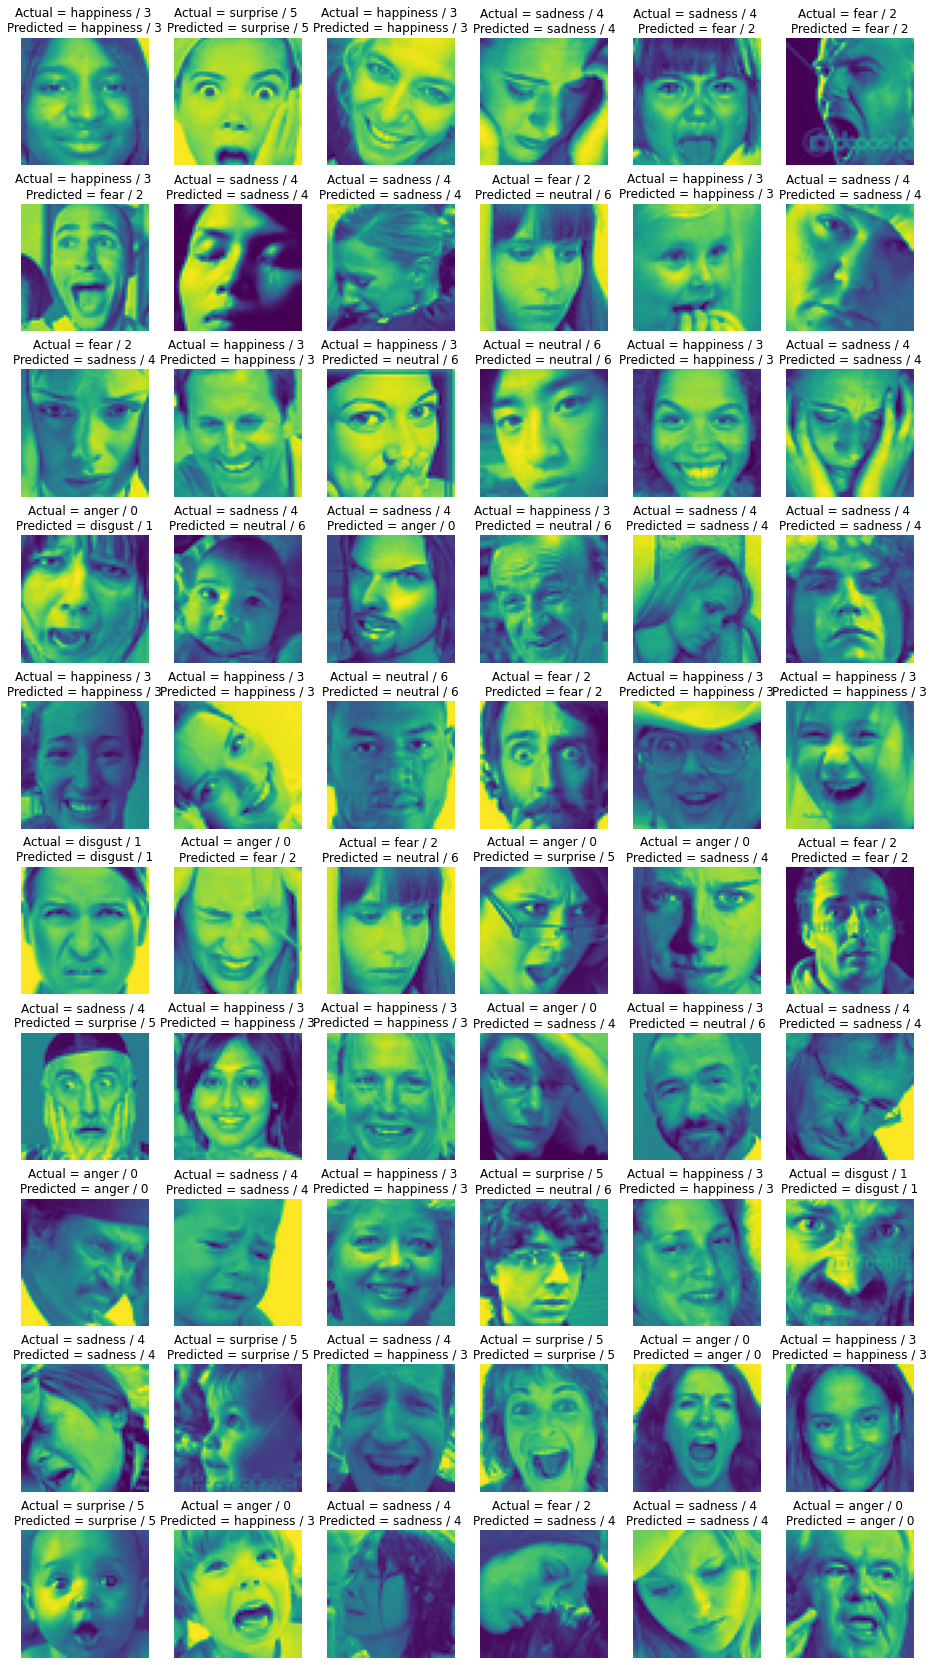

In [25]:
#2nd_Prediction
import matplotlib.pyplot as plt
plt.figure(figsize=(16,30))
 
j=1
for i in np.random.randint(0, 1000,60):
  plt.subplot(10,6, j); j+=1
  plt.imshow(X_test[i].reshape(48,48))
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(label_to_text[y_test[i]], y_test[i], label_to_text[np.argmax(y_pred[i])],np.argmax(y_pred[i])))
  plt.axis('off')

In [26]:
from sklearn.metrics import confusion_matrix
 
plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test, y_pred_labels)

<Figure size 1152x648 with 0 Axes>

<AxesSubplot:>

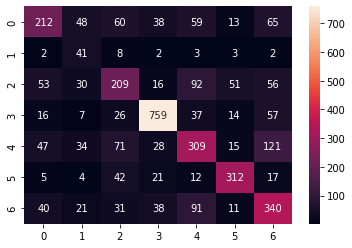

In [27]:
sns.heatmap(cm, annot=True, fmt='d',xticklabels=label_to_text, yticklabels=label_to_text)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_labels))
#print(cr)


              precision    recall  f1-score   support

           0       0.57      0.43      0.49       495
           1       0.22      0.67      0.33        61
           2       0.47      0.41      0.44       507
           3       0.84      0.83      0.83       916
           4       0.51      0.49      0.50       625
           5       0.74      0.76      0.75       413
           6       0.52      0.59      0.55       572

    accuracy                           0.61      3589
   macro avg       0.55      0.60      0.56      3589
weighted avg       0.62      0.61      0.61      3589

